<a href="https://colab.research.google.com/github/samuelquitiang/CUFICO_2019_2/blob/master/MontecarloInt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Montecarlo integration
integrador de montecarlo para 1 y 3 dim, obteniendo su varianza comparado con scipy.integrate
  

(0.495, 3.33106475941296e-10)
(4.32455532033676, 1.6881526376757614e-09)
Los valores de E y S para n=10 son:
 Función       E       S    
 f=$x⁻³$       0.580    0.301 
 f=$x**(1/2)$   4.133    1.686 
 f=$rac{1}{x}+y+z²$       2.540    4.031 
Los valores de E y S para n=100 son:
 Función       E       S    
 f=$x⁻³$       0.572    0.106 
 f=$x**(1/2)$   4.533    1.728 
 f=$rac{1}{x}+y+z²$       2.565    6.368 
Los valores de E y S para n=1000 son:
 Función       E       S    
 f=$x⁻³$       0.461    0.212 
 f=$x**(1/2)$   4.292    1.580 
 f=$rac{1}{x}+y+z²$       2.596    6.402 
Los valores de E y S para n=10000 son:
 Función       E       S    
 f=$x⁻³$       0.507    0.177 
 f=$x**(1/2)$   4.364    1.620 
 f=$rac{1}{x}+y+z²$       2.593    6.305 
Los valores de E y S para n=10000 son:
 Función       E       S    
 f=$x⁻³$       0.514    0.186 
 f=$x**(1/2)$   4.320    1.629 
 f=$rac{1}{x}+y+z²$       2.580    6.196 


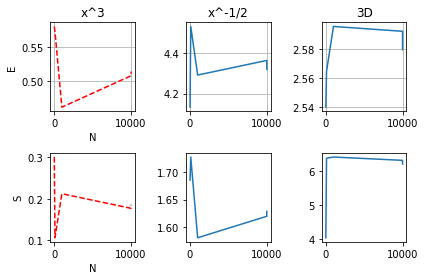

In [0]:
import numpy as np 
import scipy.integrate as sc
from random import random 
import matplotlib.pyplot as plt
from numpy import pi


#Metodo de monte Carlo

N=(10,100,1000,10000,10000)
a=1
b=10


def f(x):
    return x**-3
def f1(x):
    return x**-0.5
def f2(x,y,z):
    return 1/x + y+ z**2
ri=(1,0,0)
rf=(10,2,2)
If=sc.quad( lambda x:x**-3,1,10)
If1=sc.quad(f1,1,10)

print(If)
print(If1)
def M(f,n,a,b):    
        val=[]
        I=0
        S=0
        for j in range(n):
            x=random()
            I+=f(x*(b-a)+a) 
            E=I/n
            S+=(f(x*(b-a)+a)**2)-E**2
        S*=(b-a)/n
        E=((b-a)*E)   
        return S,E
def M3(f,n,xi,xf,yi,yf,zi,zf):
    s=0
    e=0
    for i in range(n):
        xn = (xf-xi)*random()+xi
        yn = (yf-yi)*random()+yi
        zn = (zf-zi)*random()+zi
        e+=f(xn,yn,zn)
        E=e/n

        s+=(f(xn,yn,zn))**2 - E**2
        S=s/n
    return S,E
NS_f=[]
NS_f1=[]
NS_f2=[]

NE_f=[]
NE_f1=[]
NE_f2=[]


for i in N:
    NS_f.append(M(f,i,a,b)[0])
    NS_f1.append(M(f1,i,a,b)[0])
    NS_f2.append(M3(f2,i,ri[0],rf[0],ri[1],rf[1],ri[2],rf[2])[0])

    NE_f.append(M(f,i,a,b)[1])
    NE_f1.append(M(f1,i,a,b)[1])
    NE_f2.append(M3(f2,i,ri[0],rf[0],ri[1],rf[1],ri[2],rf[2])[1])

    print('Los valores de E y S para n=%i son:'%(i))
    print(' Función       E       S    ') 
    print(' f=$x⁻³$       %.3f    %.3f '%(NE_f[-1],NS_f[-1]))
    print(' f=$x**(1/2)$   %.3f    %.3f '%(NE_f1[-1],NS_f1[-1]))
    print(' f=$\frac{1}{x}+y+z²$       %.3f    %.3f '%(NE_f2[-1],NS_f2[-1]))
ax1=plt.subplot(231)
ax2=plt.subplot(232)
ax3=plt.subplot(233)
ax4=plt.subplot(234)
ax5=plt.subplot(235)
ax6=plt.subplot(236)

ax1.plot(N,NE_f,'r--',label='x^-3')
ax2.plot(N,NE_f1,label='x^-1/2')
ax3.plot(N,NE_f2,label='3D')
ax4.plot(N,NS_f,'r--',label='x^-3')
ax5.plot(N,NS_f1,label='x^-1/2')
ax6.plot(N,NS_f2,label='3D')

ax1.grid()
ax1.set_title('x^3')
ax1.set_xlabel('N')
ax1.set_ylabel('E')
ax4.set_xlabel('N')
ax4.set_ylabel('S')
ax2.grid()
ax2.set_title('x^-1/2')
ax3.grid()
ax3.set_title('3D')
plt.tight_layout()

plt.show()



Metodo de Metropolis para generacióón de numeros aleatoreos que siguen cierta probabilidad

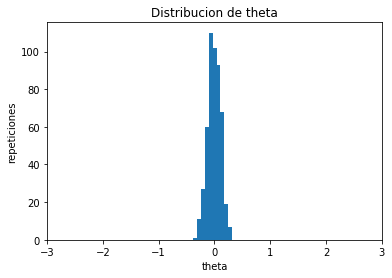

In [0]:

mu=0
sigma=0.1
n=10000
def P(phi):
  l=sigma*(2*np.pi)**0.5
  m=np.exp(-(phi-mu)**2/(2*sigma**2))
  return m/l
phi=random()*2*pi-pi
A=[random()*2*pi-pi]  
for i in range(n): 
  phi1 = random()*2*pi-pi
  ds = -np.log(P(phi1)/P(A[-1]))
  if ds<0:
    A.append(phi1)
  elif ds>0:
    v=random()
    p=P(phi1)/P(A[-1])
    if v<p:
      A.append(phi1)
A=np.array(A)  
     
h=plt.hist(A)
plt.title('Distribucion de theta')
plt.xlim(-3,3)
plt.ylabel('repeticiones')
plt.xlabel('theta')
plt.show()





